In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns

In [26]:
def load_data_from_folders(paths: list[str], subfolder_key: str) -> pd.DataFrame:
    records = []
    for path in paths:
        main_folder = os.path.basename(path)
        for subfolder in sorted(os.listdir(path)):
            subfolder_path = os.path.join(path, subfolder)
            if os.path.isdir(subfolder_path):
                value = int(subfolder.replace(subfolder_key, ''))
                for seed_folder in sorted(os.listdir(subfolder_path)):
                    seed_path = os.path.join(subfolder_path, seed_folder)
                    avg_file = os.path.join(seed_path, 'averages.json')
                    if os.path.exists(avg_file):
                        with open(avg_file, 'r') as f:
                            avg_data = json.load(f)
                            record = {'experiment': main_folder, subfolder_key: value, 'seed': seed_folder}
                            record.update(avg_data)
                            records.append(record)
    return pd.DataFrame(records)

In [27]:
path_to_dir = pathlib.Path("~/research/remote-data/").expanduser()
paths = [path_to_dir/"few-entities", path_to_dir/"all-entities-in-domain", path_to_dir/"all-entities-out-domain"]
df = load_data_from_folders(paths, 'shots')
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"])

In [28]:
df['experiment'] = df['experiment'].map(
    {'few-entities': "case-entities (in-domain)", 
    "all-entities-out-domain":'all-entities (out-domain)', 
    "all-entities-in-domain": 'all-entities (in-domain)'})
df

,experiment,shots,seed,recall,precision,exact_match,positive_ratio,negative_ratio,f1
0,case-entities (in-domain),0,seed1,0.918833,0.908333,0.810833,0.916833,0.952967,0.913553
1,case-entities (in-domain),0,seed2,0.936600,0.884900,0.798100,0.957967,0.941067,0.910016
2,case-entities (in-domain),0,seed3,0.929633,0.895067,0.804867,0.934667,0.951100,0.912023
3,case-entities (in-domain),10,seed1,0.962400,0.908700,0.843267,0.989533,0.941233,0.934779
4,case-entities (in-domain),10,seed2,0.965733,0.898267,0.836800,0.998300,0.933500,0.930779
...,...,...,...,...,...,...,...,...,...
67,all-entities (out-domain),50,seed2,0.897000,0.465500,0.542667,1.242933,0.719800,0.612923
68,all-entities (out-domain),50,seed3,0.868233,0.456533,0.553567,1.205100,0.751167,0.598411
69,all-entities (out-domain),5,seed1,0.911700,0.444833,0.520067,1.265967,0.669733,0.597928
70,all-entities (out-domain),5,seed2,0.894500,0.467600,0.534500,1.188100,0.701567,0.614152


In [29]:
def plot_shot_metrics(df: pd.DataFrame, metric: str) -> None:
    # Set a color palette for better readability
    palette = sns.color_palette("Set1")
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['shots', 'experiment'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    plt.figure(figsize=(12, 8))
    for i, exp in enumerate(agg_df['experiment'].unique()):
        subset = agg_df[agg_df['experiment'] == exp]
        plt.plot(subset['shots'], subset['mean'], label=exp, color=palette[i])
        plt.fill_between(subset['shots'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    plt.xlabel('Number of Shots')
    plt.ylabel(f'Metric: {metric}')
    plt.title(f'{metric} across different number of shots (Llama 70B Instruct)')
    plt.legend(title='Experiments')
    plt.grid(True)
    plt.show()

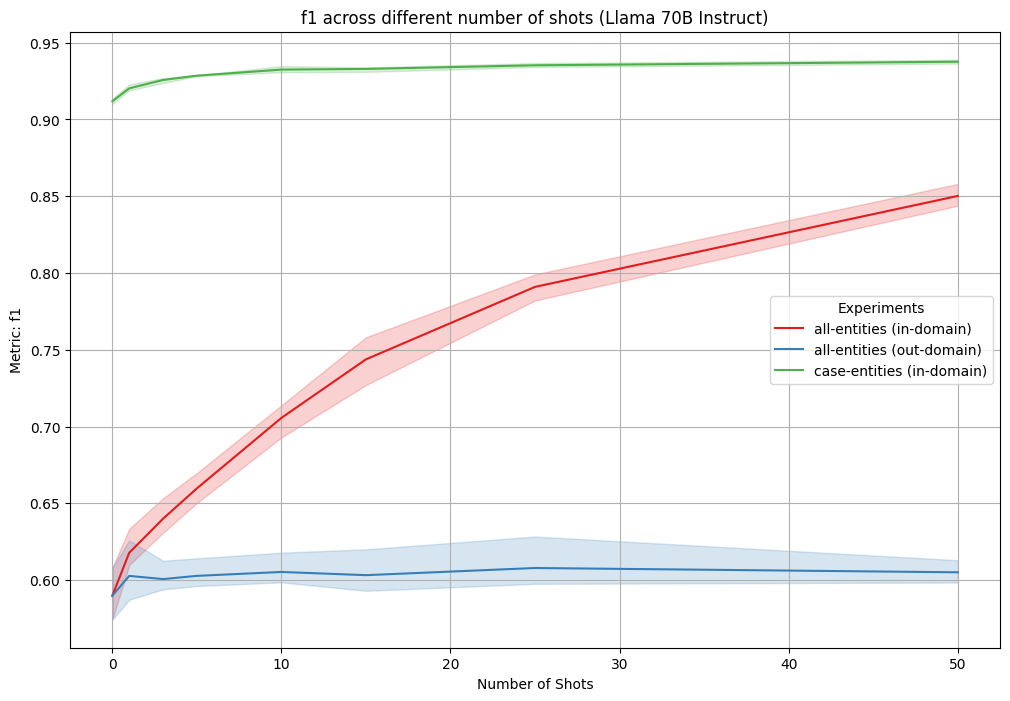

In [30]:
plot_shot_metrics(df, 'f1')

In [49]:
path_to_dir = pathlib.Path("~/research/remote-data/").expanduser()
paths = [path_to_dir/"zero-shot-negative-sampling"]
df = load_data_from_folders(paths, 'negatives')
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"])

In [50]:
df

,experiment,negatives,seed,recall,precision,exact_match,positive_ratio,negative_ratio,f1
0,zero-shot-negative-sampling,0,seed1,0.933967,0.913633,0.837233,0.954467,0.958633,0.923688
1,zero-shot-negative-sampling,0,seed2,0.943733,0.906633,0.831367,0.967033,0.952533,0.924811
2,zero-shot-negative-sampling,0,seed3,0.948800,0.888767,0.826733,0.998433,0.952433,0.917803
3,zero-shot-negative-sampling,100,seed1,0.849633,0.514867,0.573867,1.106267,0.778233,0.641184
4,zero-shot-negative-sampling,100,seed2,0.846233,0.520233,0.586767,1.067033,0.825267,0.644346
5,zero-shot-negative-sampling,100,seed3,0.826933,0.523400,0.610833,0.959833,0.857600,0.641052
6,zero-shot-negative-sampling,10,seed1,0.939367,0.806000,0.772433,1.007700,0.927300,0.867588
7,zero-shot-negative-sampling,10,seed2,0.918300,0.824000,0.772033,0.982000,0.925933,0.868598
8,zero-shot-negative-sampling,10,seed3,0.933133,0.805833,0.755933,1.021033,0.893267,0.864824
9,zero-shot-negative-sampling,25,seed1,0.896200,0.701200,0.685600,1.026800,0.866233,0.786798


In [47]:
def plot_negatives_metrics(df: pd.DataFrame, metric: str) -> None:
    # Set a color palette for better readability
    palette = sns.color_palette("Set1")
    # Aggregating the data to calculate mean, min, and max for the specified metric
    agg_df = df.groupby(['negatives', 'experiment'])[metric].agg(['mean', 'min', 'max']).reset_index()

    # Plotting the line chart with shaded areas
    plt.figure(figsize=(12, 8))
    for i, exp in enumerate(agg_df['experiment'].unique()):
        subset = agg_df[agg_df['experiment'] == exp]
        plt.plot(subset['negatives'], subset['mean'], label=exp, marker='o', color=palette[i])
        plt.fill_between(subset['negatives'], subset['min'], subset['max'], alpha=0.2, color=palette[i])

    # Labeling the plot
    plt.xlabel('Number of Negatives')
    plt.ylabel(f'Metric: {metric}')
    plt.title(f'{metric} with increasing number of sampled negatives (Llama 70B Instruct)')
    plt.legend(title='Experiments')
    plt.grid(True)
    plt.show()

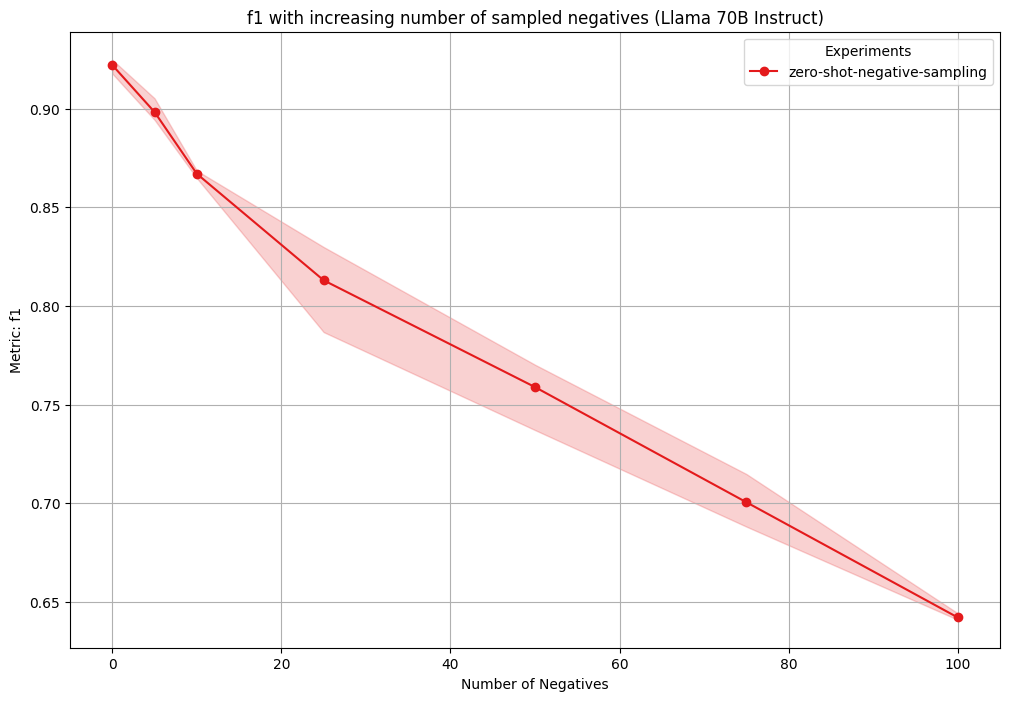

In [51]:
plot_negatives_metrics(df, 'f1')

In [3]:
# Load the CSV file to examine its content
file_path = pathlib.Path('~/Developer/code/patient-note-alignment/reports/data/alignment_benchmark_runs.csv').expanduser()
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows and the column names to understand the structure
df.head(), df.columns

(                             Run ID                              deployment  \
 0  370d90a9d3d6489684c8a877bd4ebf6f  meta-llama/Meta-Llama-3.1-70B-Instruct   
 1  e1a859f73d2b4d45b2fb64c131567267  meta-llama/Meta-Llama-3.1-70B-Instruct   
 2  905d4b5c08c7406f956e9e1571e4c778  meta-llama/Meta-Llama-3.1-70B-Instruct   
 3  f43c81b17ffd41f7b15362f0870df98f  meta-llama/Meta-Llama-3.1-70B-Instruct   
 4  7596e7049d1544098f245780a83a93e5  meta-llama/Meta-Llama-3.1-70B-Instruct   
 
    num_shots  seed  exact_match/mean  f1_score/mean  negative_ratio/mean  \
 0         50     5          0.879376       0.941182             0.937305   
 1         50     4          0.876110       0.938086             0.935738   
 2         50     3          0.879997       0.938771             0.942646   
 3         50     2          0.878013       0.939972             0.940910   
 4         50     1          0.877051       0.938893             0.935359   
 
    positive_ratio/mean  precision/mean  recall/mean  

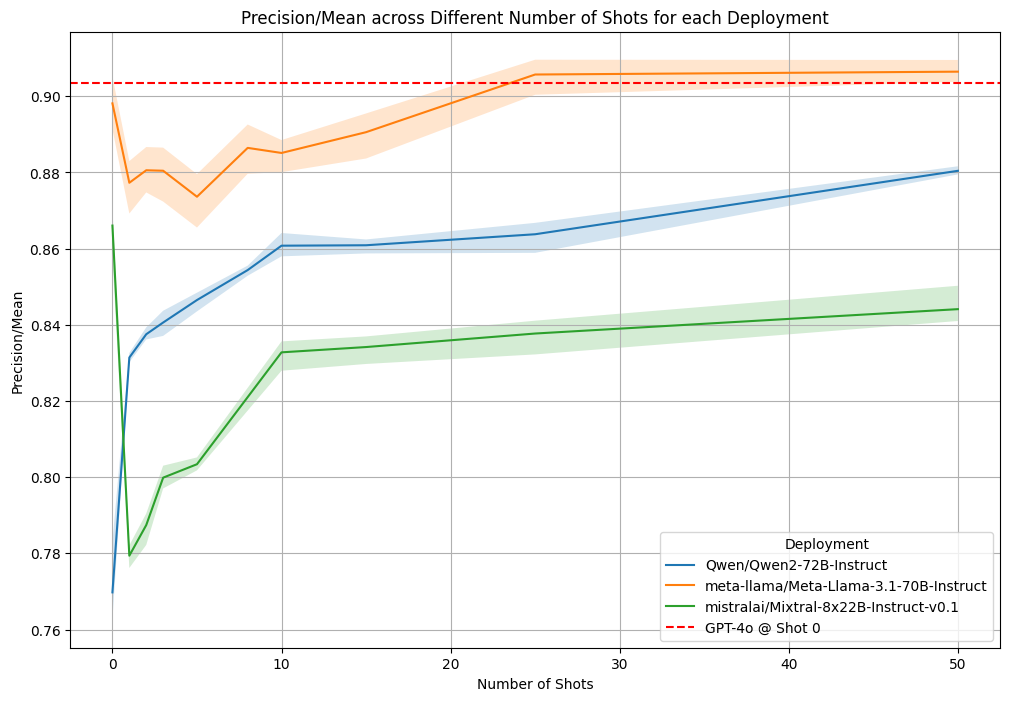

In [29]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['precision/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.9035, color='red', linestyle='--', label='GPT-4o @ Shot 0')

# Labeling the plot
plt.xlabel('Number of Shots')
plt.ylabel('Precision/Mean')
plt.title('Precision/Mean across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

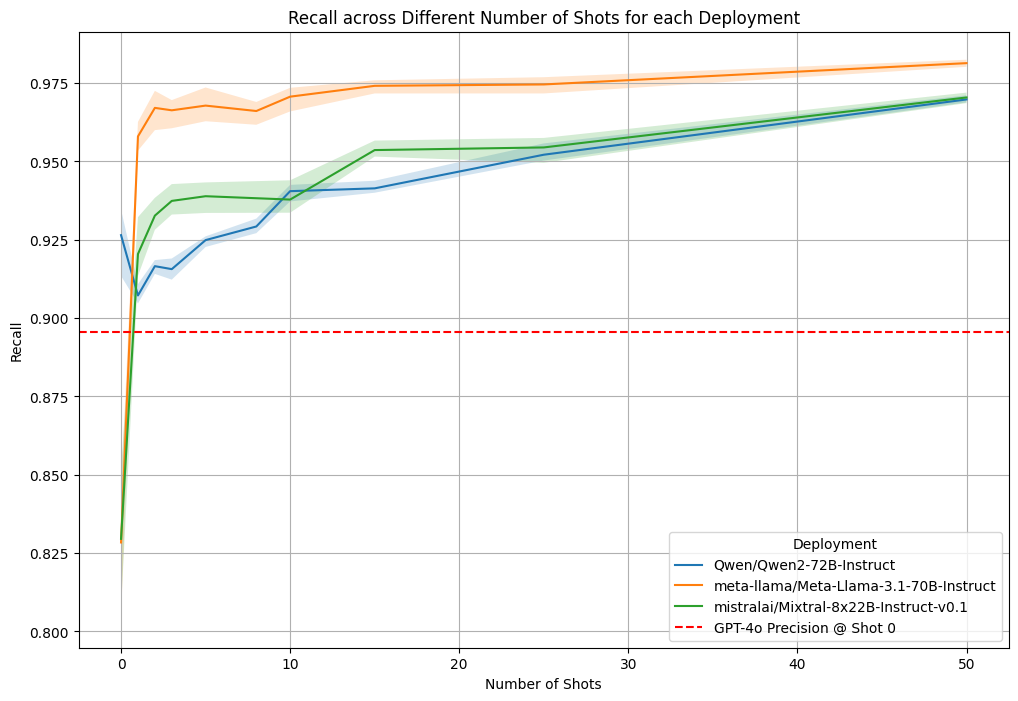

In [24]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['recall/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8956, color='red', linestyle='--', label='GPT-4o @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Recall')
plt.title('Recall across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

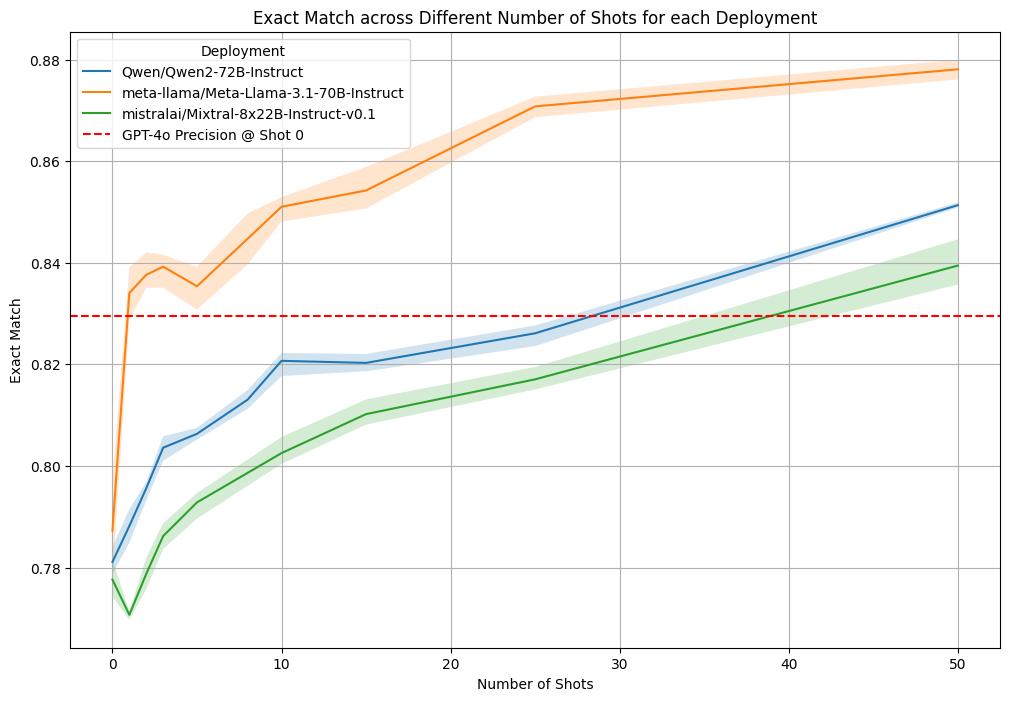

In [28]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.8296, color='red', linestyle='--', label='GPT-4o @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Exact Match')
plt.title('Exact Match across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

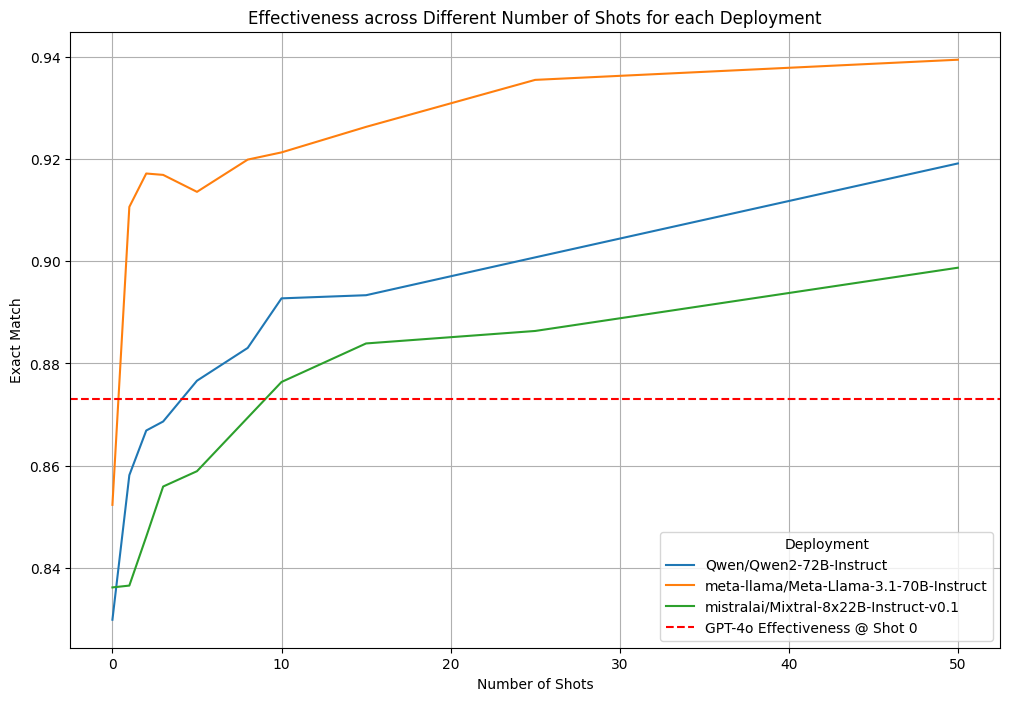

In [7]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    # plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

# Adding horizontal dotted red lines for GPT-4o and GPT-4-turbo
plt.axhline(y=0.873, color='red', linestyle='--', label='GPT-4o Effectiveness @ Shot 0')

plt.xlabel('Number of Shots')
plt.ylabel('Exact Match')
plt.title('Effectiveness across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()

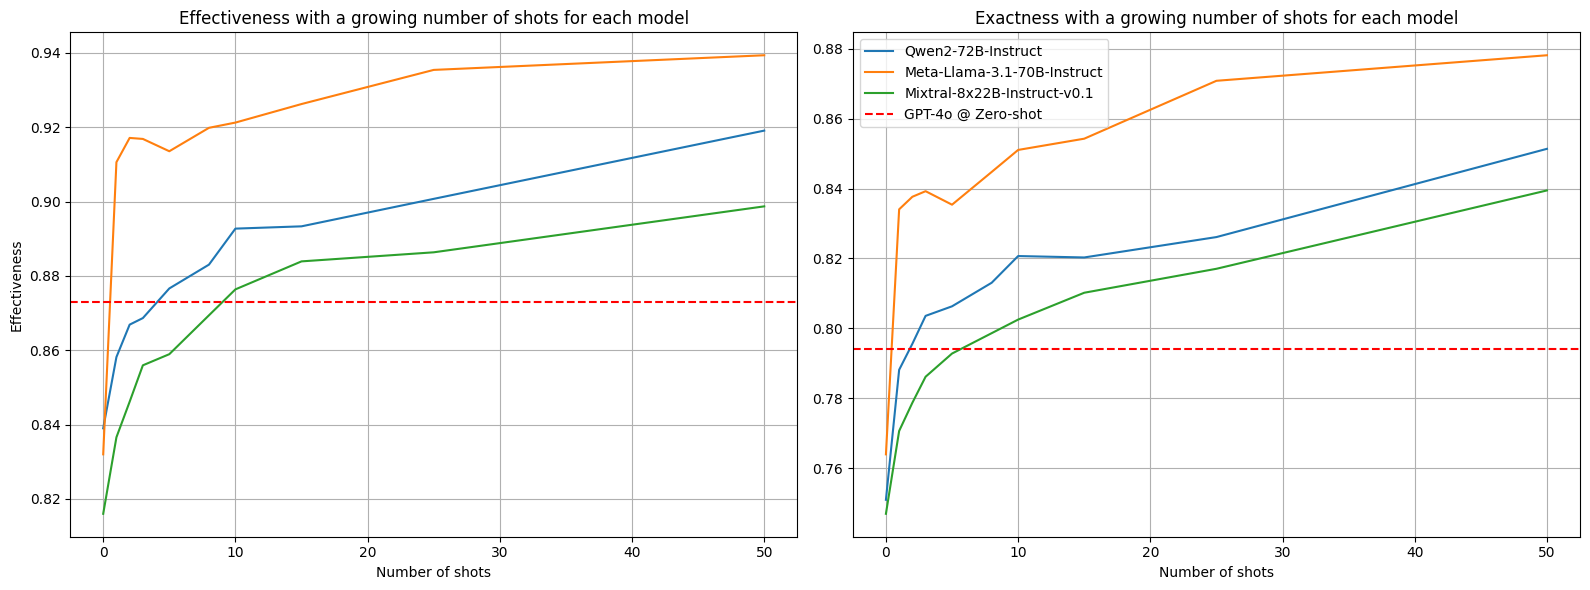

In [11]:
update_values = {
    'meta-llama/Meta-Llama-3.1-70B-Instruct': {'f1_score/mean': 0.832, 'exact_match/mean': 0.764},
    'Qwen/Qwen2-72B-Instruct': {'f1_score/mean': 0.839, 'exact_match/mean': 0.751},
    'mistralai/Mixtral-8x22B-Instruct-v0.1': {'f1_score/mean': 0.816, 'exact_match/mean': 0.747},
}

agg_df1 = df.groupby(['num_shots', 'deployment'])['f1_score/mean'].agg(['mean', 'min', 'max']).reset_index()
agg_df2 = df.groupby(['num_shots', 'deployment'])['exact_match/mean'].agg(['mean', 'min', 'max']).reset_index()

for model, values in update_values.items():
    agg_df1.loc[(agg_df1['num_shots'] == 0) & (agg_df1['deployment'] == model), 'mean'] = values['f1_score/mean']
    agg_df2.loc[(agg_df2['num_shots'] == 0) & (agg_df2['deployment'] == model), 'mean'] = values['exact_match/mean']

# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the first metric (f1_score/mean) on the first subplot
for deployment in agg_df1['deployment'].unique():
    subset = agg_df1[agg_df1['deployment'] == deployment]
    axes[0].plot(subset['num_shots'], subset['mean'], label=deployment.split("/")[-1])

axes[0].set_xlabel('Number of shots')
axes[0].set_ylabel('Effectiveness')
axes[0].set_title('Effectiveness with a growing number of shots for each model')
axes[0].axhline(y=0.873, color='red', linestyle='--', label='GPT-4o @ Shot 0')
axes[0].grid(True)

# Plotting the second metric (another_metric/mean) on the second subplot
for deployment in agg_df2['deployment'].unique():
    subset2 = agg_df2[agg_df2['deployment'] == deployment]
    axes[1].plot(subset2['num_shots'], subset2['mean'], label=deployment.split("/")[-1])

axes[1].set_xlabel('Number of shots')
axes[1].set_title('Exactness with a growing number of shots for each model')
axes[1].axhline(y=0.794, color='red', linestyle='--', label='GPT-4o @ Zero-shot')
axes[1].legend(title=None)
axes[1].grid(True)

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

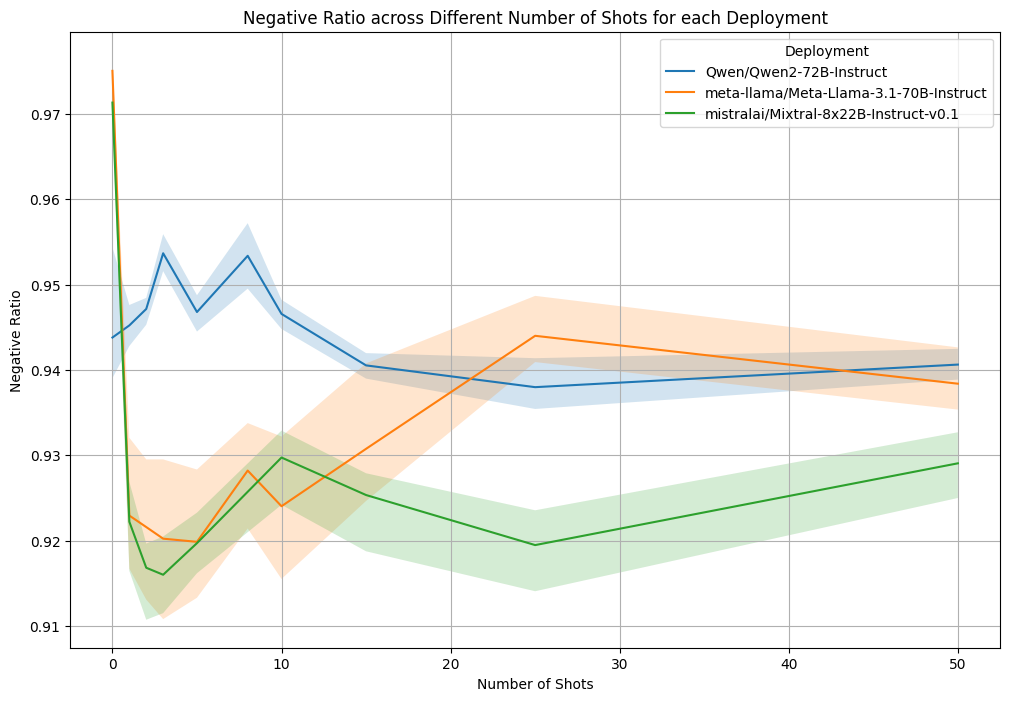

In [27]:
# Aggregating the data to calculate mean, min, and max for precision/mean
agg_df = df.groupby(['num_shots', 'deployment'])['negative_ratio/mean'].agg(['mean', 'min', 'max']).reset_index()

# Plotting the line chart with shaded areas
plt.figure(figsize=(12, 8))
for prompt in agg_df['deployment'].unique():
    subset = agg_df[agg_df['deployment'] == prompt]
    plt.plot(subset['num_shots'], subset['mean'], label=prompt)
    plt.fill_between(subset['num_shots'], subset['min'], subset['max'], alpha=0.2)

plt.xlabel('Number of Shots')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio across Different Number of Shots for each Deployment')
plt.legend(title='Deployment')
plt.grid(True)
plt.show()